In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import r2_score, PredictionErrorDisplay

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2024-01-05 22:24:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2024-01-05 22:24:18 (520 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0  75571      0 --:--:-- --:--:-- --:--:-- 75576


In [ ]:
df = pd.read_csv("FuelConsumption.csv")

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.columns.tolist(), len(df.columns.tolist())

(['MODELYEAR',
  'MAKE',
  'MODEL',
  'VEHICLECLASS',
  'ENGINESIZE',
  'CYLINDERS',
  'TRANSMISSION',
  'FUELTYPE',
  'FUELCONSUMPTION_CITY',
  'FUELCONSUMPTION_HWY',
  'FUELCONSUMPTION_COMB',
  'FUELCONSUMPTION_COMB_MPG',
  'CO2EMISSIONS'],
 13)

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
#no missing data all columns elements same


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [ ]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


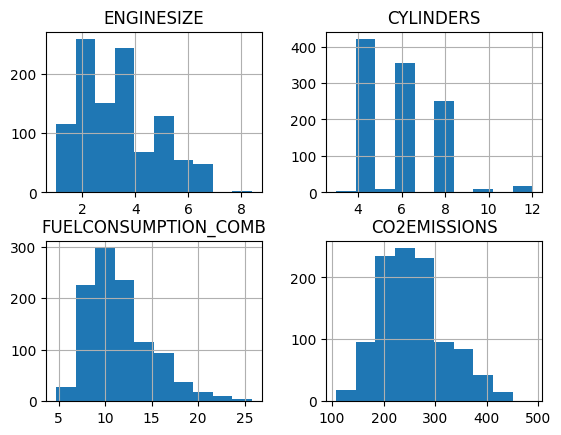

In [ ]:
vis = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
vis.hist()
plt.show()

CO2EMISSIONS vs FUELCONSUMPTION_COMB  

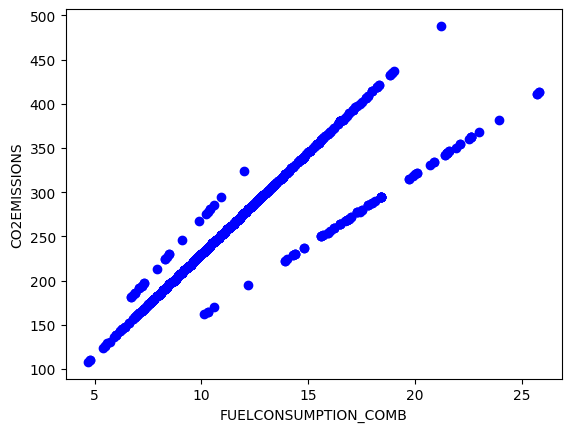

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

CO2EMISSIONS vs ENGINESIZE


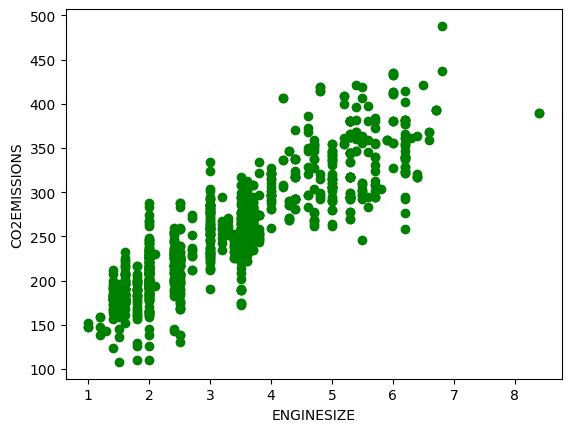

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'green')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

CO2EMISSIONS vs CYLINERS

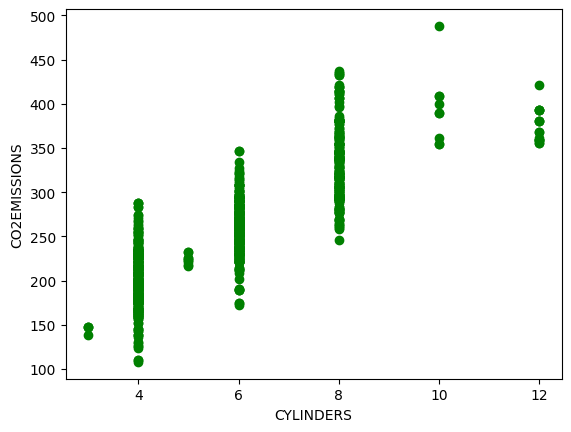

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'green')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

Creating train and test dataset

In [ ]:
msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
len(train), len(test), len(cdf)

(847, 220, 1067)

Train data distribution

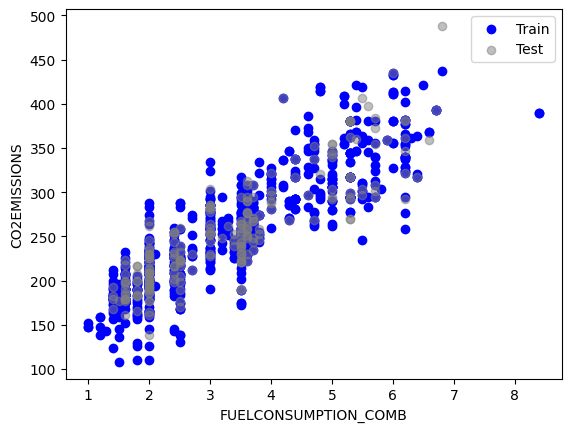

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'Blue', label = 'Train')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'grey', label = 'Test', alpha = 0.5)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

Modelling - Engine size vs CO2 emmission

In [ ]:
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

reg.fit(train_x, train_y)
print('Coefficent: ', reg.coef_)
print('Intercept: ',reg.intercept_)

Coefficent:  [[39.25094012]]
Intercept:  [124.73849596]


Plot the regression line on top of the train data points

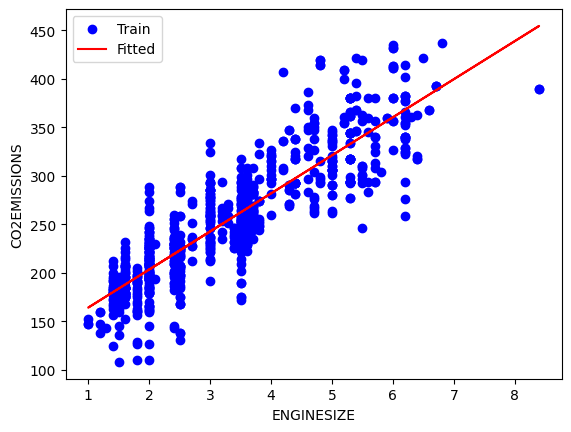

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'Blue', label = 'Train')
plt.plot(train_x, train_x*reg.coef_[0][0]+reg.intercept_[0], '-r', label = 'Fitted')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

Evalution of the fitted model

In [ ]:
#prepare the test data and predict
test_x =np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = reg.predict(test_x)

#compare the prediction vs actual
print("MAE: %.2f"% np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of sqaures(MSE): %.2f"% np.mean((test_yhat - test_y)**2))
print("R-sqd: %.2f"% r2_score(test_yhat, test_y))

MAE: 23.27
Residual sum of sqaures(MSE): 910.17
R-sqd: 0.69


Modelling Fuel consumption vs CO2 emmission

In [ ]:
def linear_reg(cdf, feature, target):
  msk = np.random.rand(len(df)) <0.8
  train = cdf[msk]
  test = cdf[~msk]


  train_x = np.asanyarray(train[[feature]])
  train_y = np.asanyarray(train[[target]])

  test_x = np.asanyarray(test[[feature]])
  test_y = np.asanyarray(test[[target]])

  reg = linear_model.LinearRegression()
  reg.fit(train_x, train_y)

  test_yhat = reg.predict(test_x)

  plt.scatter(train_x, train_y, color = 'Blue', label = 'Train')
  plt.plot(train_x, train_x*reg.coef_[0][0]+reg.intercept_[0], '-r', label = 'Fitted')
  plt.xlabel(f'{feature}')
  plt.ylabel(f'{target}')
  plt.legend()
  plt.show()

  print(f'{feature} vs {target} - ',"MAE : %.2f"% np.mean(np.absolute(test_yhat - test_y)))
  print(f'{feature} vs {target} - ',"Mean Squared Error(MSE): %.2f"% np.mean((test_yhat - test_y)**2))
  print(f'{feature} vs {target} - ',"R-sqd: %.2f"% r2_score(test_yhat, test_y))





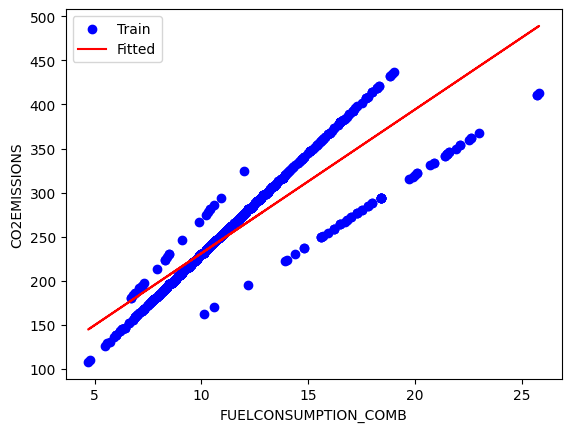

FUELCONSUMPTION_COMB vs CO2EMISSIONS -  MAE : 22.54
FUELCONSUMPTION_COMB vs CO2EMISSIONS -  Mean Squared Error(MSE): 1000.74
FUELCONSUMPTION_COMB vs CO2EMISSIONS -  R-sqd: 0.72


In [ ]:
linear_reg(cdf, 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS')

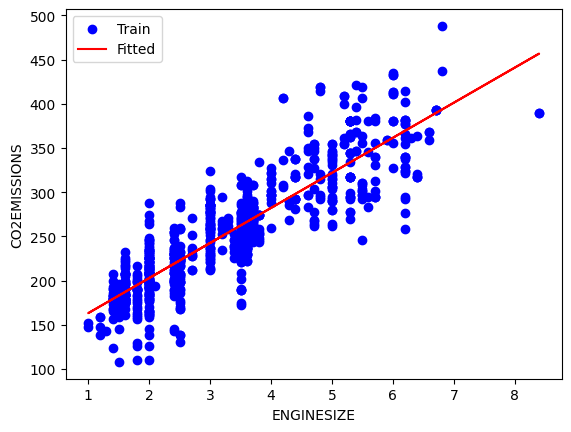

ENGINESIZE vs CO2EMISSIONS -  MAE : 22.38
ENGINESIZE vs CO2EMISSIONS -  Mean Squared Error(MSE): 820.75
ENGINESIZE vs CO2EMISSIONS -  R-sqd: 0.72


In [ ]:
#the result will change each time we rundue to the random choice of the mask values. This is the reason we use K-Fold cross validation
linear_reg(cdf, 'ENGINESIZE', 'CO2EMISSIONS')

#comparison
1. ENGINESIZE vs CO2EMISSIONS has higher MAE than FUELCONSUMPTION_COMB vs
CO2EMISSIONS
2. Fuel consumption has higher R-sqd valu than engine size, meaning prediction CO2 emmsion based on the fuel consumption is more relaible than predicting using engine size



##check the assumption of SLR
Ref:: https://online.stat.psu.edu/stat500/lesson/9/9.2/9.2.3


## 1. Linearity:
The relationship between feature and target must be linear.
Check this assumption by examining a scatterplot of x and y.

###2. Independence of errors:
There is not a relationship between the residuals and the Y variable; in other words, Y is independent of errors.

  Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.

In [ ]:
def residual_vs_fit(cdf, feature, target):
  msk = np.random.rand(len(df)) <0.8
  train = cdf[msk]
  test = cdf[~msk]


  train_x = np.asanyarray(train[[feature]])
  train_y = np.asanyarray(train[[target]])

  test_x = np.asanyarray(test[[feature]])
  test_y = np.asanyarray(test[[target]])

  reg = linear_model.LinearRegression()
  reg.fit(train_x, train_y)

  test_yhat = reg.predict(test_x)

  display = PredictionErrorDisplay(y_true=test_y, y_pred = test_yhat)
  display.plot()

  plt.show()


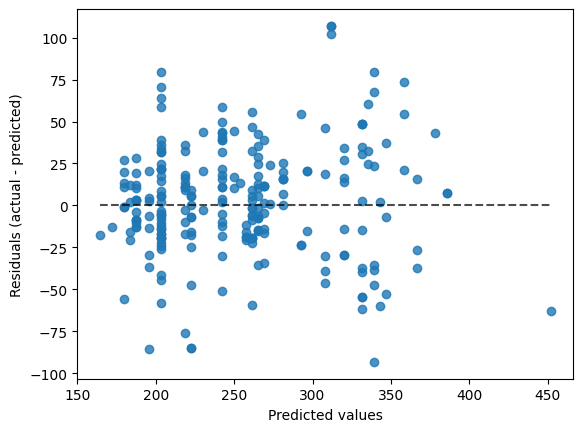

In [ ]:
residual_vs_fit(cdf, 'ENGINESIZE', 'CO2EMISSIONS')

##3.Normality of errors:
The residuals must be approximately normally distributed.

Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.

In [ ]:
def normality_errors(cdf, feature, target):
  msk = np.random.rand(len(df)) <0.8
  train = cdf[msk]
  test = cdf[~msk]


  train_x = np.asanyarray(train[[feature]])
  train_y = np.asanyarray(train[[target]])

  test_x = np.asanyarray(test[[feature]])
  test_y = np.asanyarray(test[[target]])

  reg = linear_model.LinearRegression()
  reg.fit(train_x, train_y)

  test_yhat = reg.predict(test_x)

  residuals = test_y - test_yhat

  sns.displot(residuals, kde = True)
  # plt.hist(residuals)
  # plt.show()

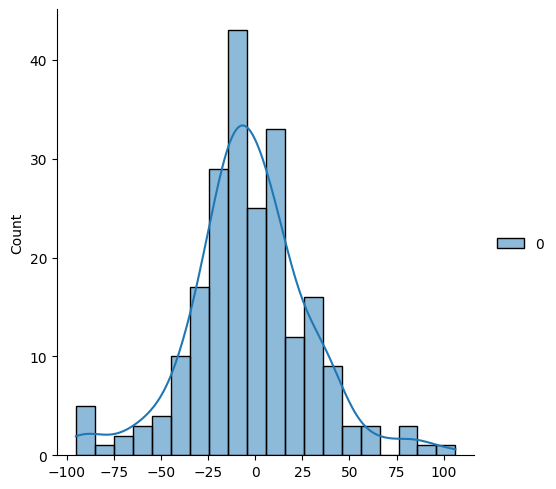

In [ ]:
#cheack the residauls are normally distributed?
normality_errors(cdf, 'ENGINESIZE', 'CO2EMISSIONS')

##4.Equal variances:
The variance of the residuals is the same for all values of X

Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

In [ ]:
def residual_variance(cdf, feature, target):
  msk = np.random.rand(len(df)) <0.8
  train = cdf[msk]
  test = cdf[~msk]


  train_x = np.asanyarray(train[[feature]])
  train_y = np.asanyarray(train[[target]])

  test_x = np.asanyarray(test[[feature]])
  test_y = np.asanyarray(test[[target]])

  reg = linear_model.LinearRegression()
  reg.fit(train_x, train_y)

  test_yhat = reg.predict(test_x)

  residuals = test_y - test_yhat
  max_resid, min_resid = max(residuals), min(residuals)

  display = PredictionErrorDisplay(y_true=test_y, y_pred = test_yhat)
  display.plot()

  plt.plot(np.arange(min(test_yhat), max(test_yhat)), max_resid*np.ones(len(np.arange(min(test_yhat), max(test_yhat)))))
  plt.plot(np.arange(min(test_yhat), max(test_yhat)), min_resid*np.ones(len(np.arange(min(test_yhat), max(test_yhat)))))
  plt.show()

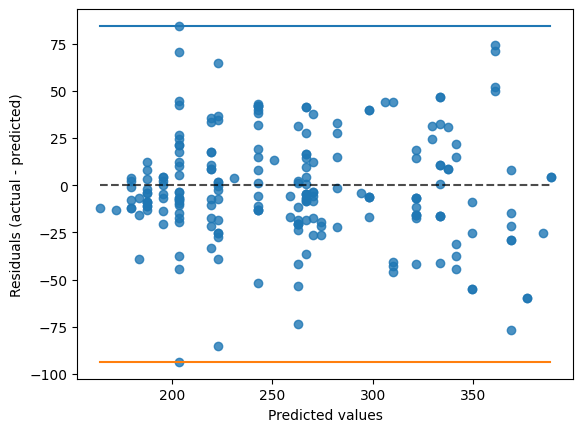

In [ ]:
residual_variance(cdf, 'ENGINESIZE', 'CO2EMISSIONS')